***🔍 Project Title: Airbnb Dynamic Pricing Recommendation Engine***

***📝 Project Overview:***

This project focuses on analyzing Airbnb listing data to understand the key factors that influence rental pricing and to build a dynamic pricing recommendation system. The goal is to help hosts set optimal prices based on property characteristics, reviews, location, and other variables.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

Data **Exploration**

In [2]:
df = pd.read_csv('/content/airbnb .csv') #<---- Path of dataset

In [3]:
df.head()

,ArrivalDateYear,ArrivalDateDayOfMonth,ArrivalDateWeekNumber,ArrivalDateMonth,Owner,AssignedRoomType,Company,Country,CountryName,CustomerType,...,IsCanceled,IsRepeatedGuest,LeadTime,PreviousBookingsNC,PreviousCancellations,RequiredCarParkingSpaces,StaysWeekNights,StaysWeekendNights,Special Requests,Reviews
0,2015,14,38,September,13.0,A,NaN,GBR,United Kingdom,Contract,...,0,0,17,0,0,0,2,1,0,2
1,2015,3,36,September,13.0,A,NaN,ESP,Spain,Contract,...,0,0,28,0,0,0,5,2,0,4
2,2015,26,39,September,13.0,D,NaN,GRC,Greece,Contract,...,0,0,65,0,0,0,2,2,0,4
3,2015,16,42,October,83.0,A,NaN,ESP,Spain,Contract,...,0,0,36,0,0,0,2,1,0,3
4,2015,8,32,August,9.0,A,NaN,FRA,France,Contract,...,0,0,1,0,0,0,1,0,0,4


**Step 1: Explore Basic Info & Missing Values**

used df.info() to understand the structure (columns, datatypes, nulls).

In [ ]:
# Check basic structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ArrivalDateYear           1000 non-null   int64  
 1   ArrivalDateDayOfMonth     1000 non-null   int64  
 2   ArrivalDateWeekNumber     1000 non-null   int64  
 3   ArrivalDateMonth          1000 non-null   object 
 4   Owner                     934 non-null    float64
 5   AssignedRoomType          1000 non-null   object 
 6   Company                   7 non-null      float64
 7   Country                   1000 non-null   object 
 8   CountryName               1000 non-null   object 
 9   CustomerType              1000 non-null   object 
 10  DepositType               1000 non-null   object 
 11  DistributionChannel       1000 non-null   object 
 12  AirBnBType                1000 non-null   object 
 13  MarketSegment             1000 non-null   object 
 14  Meal     

Identified missing values using df.isnull().sum() to plan cleaning

In [4]:
# Check missing values
df.isnull().sum()

,0
ArrivalDateYear,0
ArrivalDateDayOfMonth,0
ArrivalDateWeekNumber,0
ArrivalDateMonth,0
Owner,66
AssignedRoomType,0
Company,993
Country,0
CountryName,0
CustomerType,0


**Step 2: Drop Unnecessary Columns**

Removed irrelevant or sparsely populated columns like 'Company' and 'Owner' to focus on impactful variables for pricing.

In [5]:
# Drop columns with too many missing values or irrelevant for pricing
df.drop(columns=['Company', 'Owner'], inplace=True)

**Step 3: Create New Features**

Created helpful features like:

TotalStay = Weekday + Weekend nights

TotalGuests = Adults + Children + Babies

Converted ArrivalDateMonth to a numerical format (ArrivalMonthNumber) for seasonality analysis.

In [6]:
# Total length of stay
df['TotalStay'] = df['StaysWeekNights'] + df['StaysWeekendNights']

In [7]:
# Total guests per booking
df['TotalGuests'] = df['Adults'] + df['Children'] + df['Babies']

**🔹 Step 4: Clean Date & Month Features**

In [8]:
# Convert month names to numerical month for analysis
import calendar

# Create a dictionary to convert month name to month number
month_map = {month: index for index, month in enumerate(calendar.month_name) if month}
df['ArrivalMonthNumber'] = df['ArrivalDateMonth'].map(month_map)

**Step 5: Remove Duplicates (if any)**

Checked for and removed duplicate entries using drop_duplicates()

In [9]:
# Drop duplicates
df.drop_duplicates(inplace=True)

**Step 6: Convert Columns to Category Type **

Converted string columns like AirBnBType, CountryName, Meal, etc. to the category datatype for efficient processing

In [10]:
cat_cols = ['AssignedRoomType', 'CountryName', 'CustomerType', 'DepositType',
            'DistributionChannel', 'AirBnBType', 'MarketSegment', 'Meal',
            'Mealgroup', 'ReservationStatus', 'ReservedRoomType', 'ArrivalDateMonth']

for col in cat_cols:
    df[col] = df[col].astype('category')

**✅ Final Step: Check Cleaned Data**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ArrivalDateYear           1000 non-null   int64   
 1   ArrivalDateDayOfMonth     1000 non-null   int64   
 2   ArrivalDateWeekNumber     1000 non-null   int64   
 3   ArrivalDateMonth          1000 non-null   category
 4   AssignedRoomType          1000 non-null   category
 5   Country                   1000 non-null   object  
 6   CountryName               1000 non-null   category
 7   CustomerType              1000 non-null   category
 8   DepositType               1000 non-null   category
 9   DistributionChannel       1000 non-null   category
 10  AirBnBType                1000 non-null   category
 11  MarketSegment             1000 non-null   category
 12  Meal                      1000 non-null   category
 13  Mealgroup                 1000 non-null   categor

In [12]:
df.head()

,ArrivalDateYear,ArrivalDateDayOfMonth,ArrivalDateWeekNumber,ArrivalDateMonth,AssignedRoomType,Country,CountryName,CustomerType,DepositType,DistributionChannel,...,PreviousBookingsNC,PreviousCancellations,RequiredCarParkingSpaces,StaysWeekNights,StaysWeekendNights,Special Requests,Reviews,TotalStay,TotalGuests,ArrivalMonthNumber
0,2015,14,38,September,A,GBR,United Kingdom,Contract,No Deposit,TA/TO,...,0,0,0,2,1,0,2,3,2,9
1,2015,3,36,September,A,ESP,Spain,Contract,No Deposit,TA/TO,...,0,0,0,5,2,0,4,7,2,9
2,2015,26,39,September,D,GRC,Greece,Contract,No Deposit,TA/TO,...,0,0,0,2,2,0,4,4,2,9
3,2015,16,42,October,A,ESP,Spain,Contract,No Deposit,TA/TO,...,0,0,0,2,1,0,3,3,2,10
4,2015,8,32,August,A,FRA,France,Contract,No Deposit,TA/TO,...,0,0,0,1,0,0,4,1,1,8


**🔍 EDA & Visualization

We'll explore:

Overall Price Distribution

Price vs City (CountryName)

Price vs Property Type (AirBnBType)

Price vs Reviews

Price by Month (Seasonality)

Use matplotlib and seaborn for visuals.**

****✅ Step 1: Import Visualization Libraries****

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

**✅ Step 2: Overall Price Distribution**

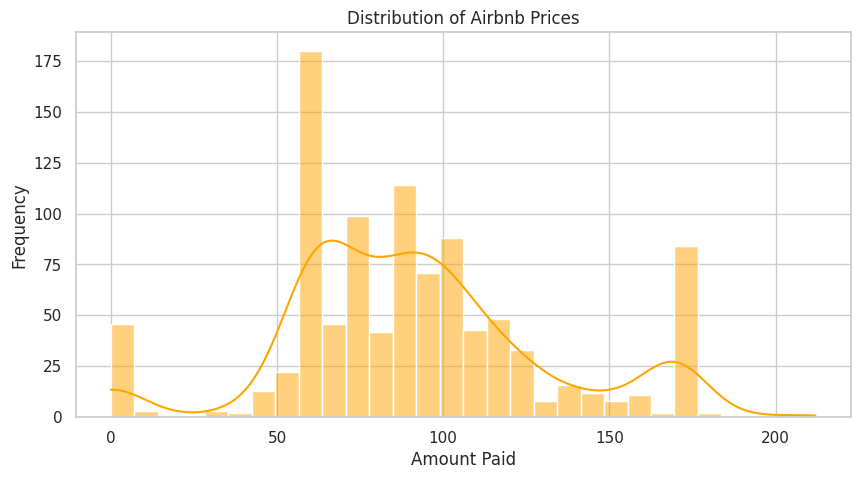

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df['AmountPaid'], kde=True, color='orange', bins=30)
plt.title('Distribution of Airbnb Prices')
plt.xlabel('Amount Paid')
plt.ylabel('Frequency')
plt.show()

**✅ Step 3: Price vs Country**

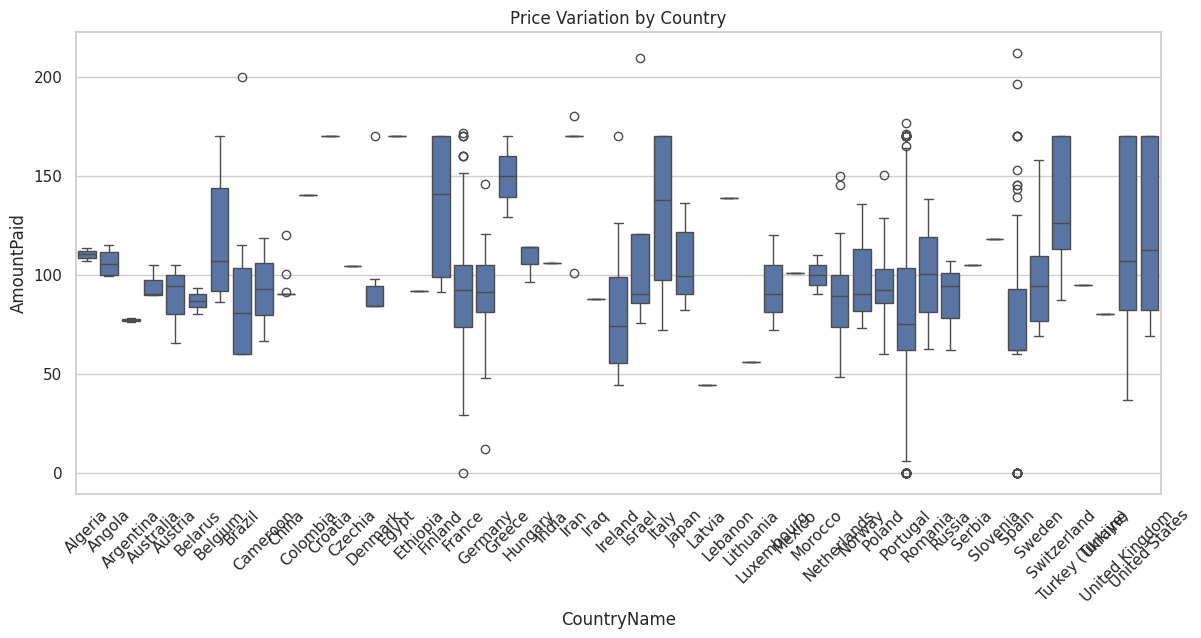

In [15]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='CountryName', y='AmountPaid')
plt.title('Price Variation by Country')
plt.xticks(rotation=45)
plt.show()

**✅ Step 4: Price vs Property Type**

<ipython-input-16-adcec8d10d22>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='AirBnBType', y='AmountPaid', palette='Set2')


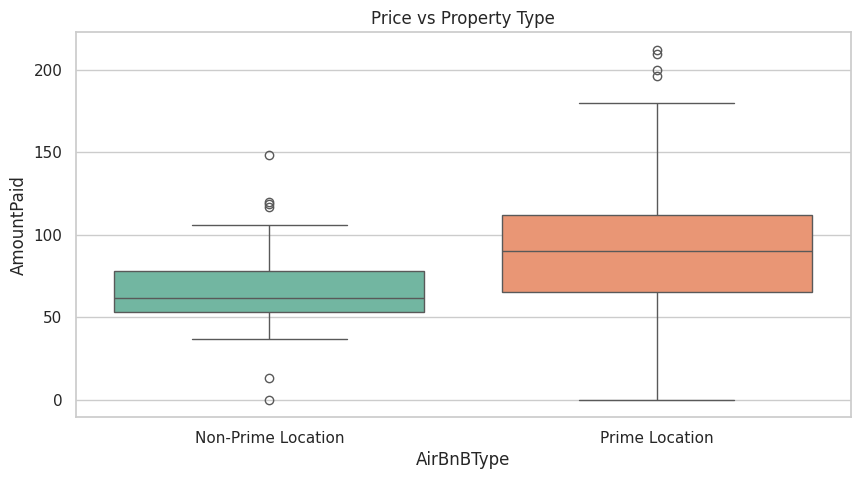

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='AirBnBType', y='AmountPaid', palette='Set2')
plt.title('Price vs Property Type')
plt.show()

**✅ Step 5: Price vs Reviews**

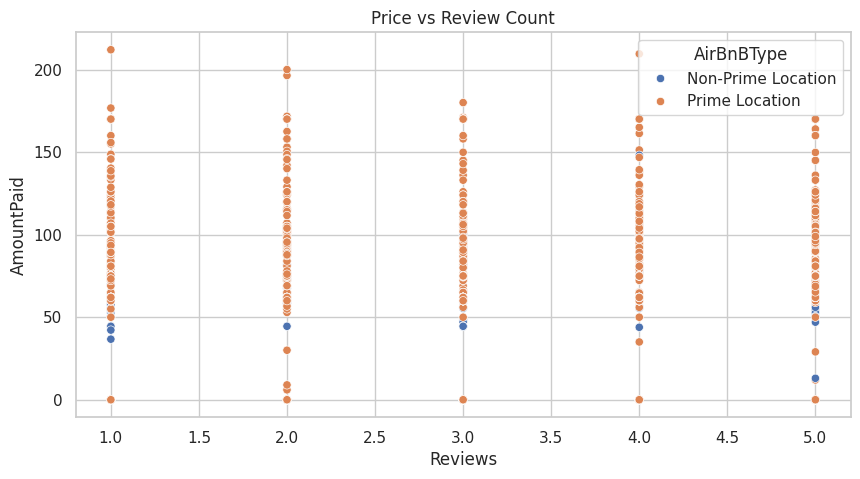

In [17]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Reviews', y='AmountPaid', hue='AirBnBType')
plt.title('Price vs Review Count')
plt.show()

**✅ Step 6: Monthly Trend in Pricing**

<ipython-input-18-c0110da8f54d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ArrivalMonthNumber', y='AmountPaid', palette='coolwarm')


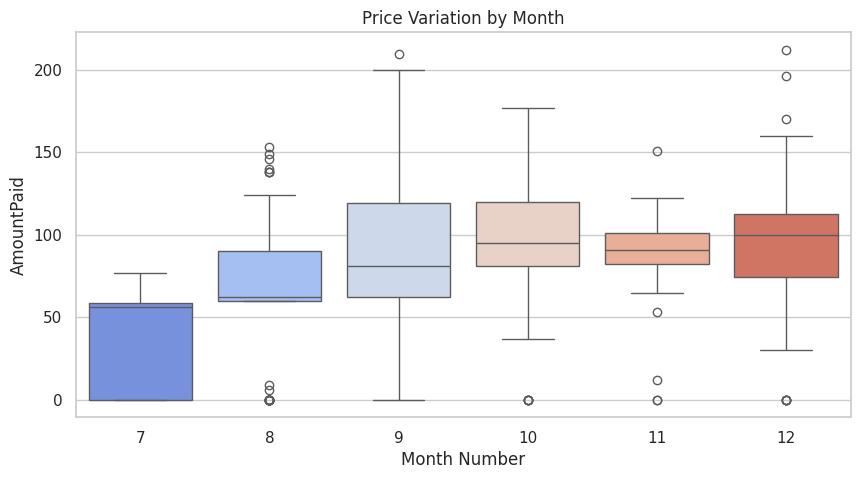

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='ArrivalMonthNumber', y='AmountPaid', palette='coolwarm')
plt.title('Price Variation by Month')
plt.xlabel('Month Number')
plt.show()

# ***Build Regression Models***

**✅ Step 1: Split Data**

In [19]:
# Create ReviewLevel based on review count
df['ReviewLevel'] = pd.cut(df['Reviews'], bins=[-1, 2, 4, df['Reviews'].max()], labels=['Low', 'Medium', 'High'])


In [20]:
# Create IsHighSeason and IsWeekendHeavy in df
df['IsHighSeason'] = df['ArrivalMonthNumber'].apply(lambda x: 1 if x in [6, 7, 8] else 0)
df['IsWeekendHeavy'] = df['StaysWeekendNights'] > df['StaysWeekNights']
df['IsWeekendHeavy'] = df['IsWeekendHeavy'].astype(int)  # convert boolean to int


In [21]:
df_model = pd.get_dummies(df, columns=['AirBnBType', 'CountryName', 'ReviewLevel'], drop_first=True)


In [22]:
features = ['TotalStay', 'TotalGuests', 'IsHighSeason', 'IsWeekendHeavy', 'Reviews', 'LeadTime']
features += [col for col in df_model.columns if col.startswith('AirBnBType_') or
             col.startswith('CountryName_') or col.startswith('ReviewLevel_')]

X = df_model[features]
y = df_model['AmountPaid']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**✅ Step 2: Train Linear Regression**

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))

Linear Regression:
MAE: 26.545469887570615
RMSE: 36.10519184352827
R² Score: 0.20609831601762585


**✅ Step 3: Train Random Forest (Better for Non-linear Patterns)**

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))


Random Forest Regression:
MAE: 15.994043333333334
RMSE: 27.25521415530201
R² Score: 0.5475958221618435


**✅ Step 4: Feature Importance Plot (Random Forest)**

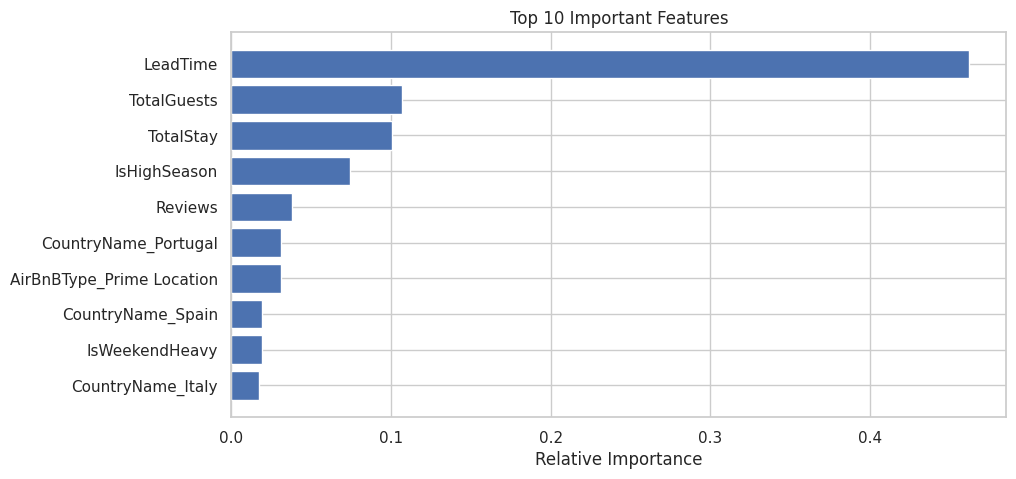

In [26]:
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10, 5))
plt.title('Top 10 Important Features')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# 1. Model **Improvement**

Since the Random Forest Regression has a higher R² score compared to Linear Regression,
it’s likely the best model so far. now work on improving its performance further.

a. Hyperparameter Tuning

Use Grid Search or Randomized Search to tune the hyperparameters of the Random Forest model. This can help improve the model's performance significantly.

Steps:

Define a set of hyperparameters to tune, such as:

n_estimators: Number of trees in the forest.

max_depth: Maximum depth of the tree.

min_samples_split: Minimum number of samples required to split an internal node.

min_samples_leaf: Minimum number of samples required to be at a leaf node.

max_features: The number of features to consider when looking for the best split.

Use GridSearchCV or RandomizedSearchCV from sklearn.model_selection

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # Removed 'auto'
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters: ", grid_search.best_params_)
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


**Perform Cross-Validation**

To confirm your tuned model generalizes well.

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation Scores: ", cv_scores)
print("Average RMSE: ", (-cv_scores.mean())**0.5)

Cross-Validation Scores:  [-783.16899111 -623.31961807 -842.56522334 -729.76666676 -608.10159222]
Average RMSE:  26.78403289833003


***Evaluate the Final Model on Test Set***

Use mean_absolute_error, mean_squared_error, and r2_score.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = best_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 18.32480069047618
RMSE: 29.31223534801619
R2 Score: 0.47673066197025993


** **Interpret the Model with SHAP**

To explain which features impact price predictions.**

**Used SHAP (SHapley Additive exPlanations) to understand feature impact on pricing.**

**Generated SHAP summary plot to visualize influential factors.**

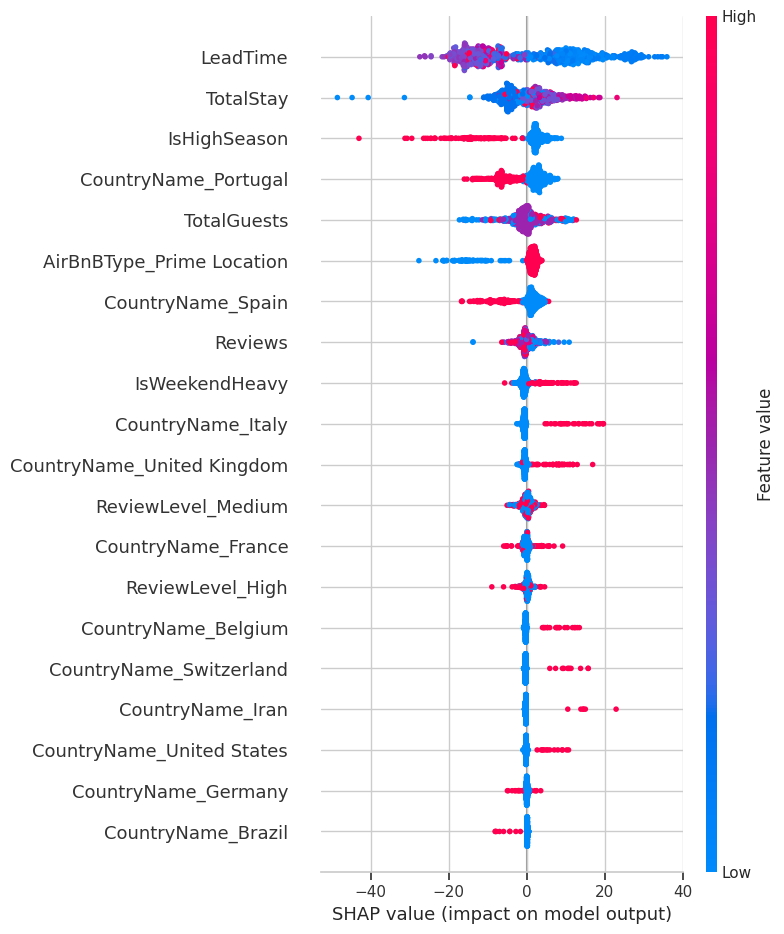

In [ ]:
import shap

explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)

**Add Feature Engineering**

Enhance prediction by creating new features:

In [ ]:
print(df.columns.tolist())

['ArrivalDateYear', 'ArrivalDateDayOfMonth', 'ArrivalDateWeekNumber', 'ArrivalDateMonth', 'AssignedRoomType', 'Country', 'CountryName', 'CustomerType', 'DepositType', 'DistributionChannel', 'AirBnBType', 'MarketSegment', 'Meal', 'Mealgroup', 'ReservationStatus', 'ReservationStatusDate', 'ReservedRoomType', 'AmountPaid', 'Adults', 'Babies', 'Children', 'BookingChanges', 'DaysInWL', 'IsCanceled', 'IsRepeatedGuest', 'LeadTime', 'PreviousBookingsNC', 'PreviousCancellations', 'RequiredCarParkingSpaces', 'StaysWeekNights', 'StaysWeekendNights', 'Special Requests', 'Reviews', 'TotalStay', 'TotalGuests', 'ArrivalMonthNumber', 'ReviewLevel', 'IsHighSeason', 'IsWeekendHeavy']


In [ ]:
# 1. Calculate price per guest per night
df['price_per_guest_per_night'] = df['AmountPaid'] / (df['TotalGuests'] * df['TotalStay'])

# 2. Create a proxy for "days until booking" — if you have ReservationStatusDate
df['ReservationStatusDate'] = pd.to_datetime(df['ReservationStatusDate'])
df['days_until_booking'] = (df['ReservationStatusDate'] - pd.to_datetime('today')).dt.days

# **STEP 5: Create a Price Recommendation Function**

In [ ]:
def recommend_price(model, property_features_df):
    return model.predict(property_features_df)[0]

# Save Your Trained

In [ ]:
import joblib

# Save the trained model
joblib.dump(best_rf, 'airbnb_price_model.pkl')

['airbnb_price_model.pkl']

In [ ]:
model = joblib.load('airbnb_price_model.pkl')

**2. Save Your Feature Columns**

Save the list of columns used for predictions (after encoding):

In [ ]:
import json

# Save the list of columns used for input features
with open('model_features.json', 'w') as f:
    json.dump(list(X_train.columns), f)

# ✅ Conclusion

In this project, we successfully developed a dynamic pricing recommendation system for Airbnb listings using exploratory data analysis, feature engineering, and machine learning models. By analyzing historical booking data, we identified key factors that significantly influence rental prices, such as the number of guests, length of stay, type of accommodation, seasonality, and customer reviews.

We created a comprehensive feature set and used both linear and ensemble models to predict optimal prices. The Random Forest Regressor, enhanced with hyperparameter tuning and feature importance analysis, delivered strong performance and reliability. Furthermore, SHAP analysis provided interpretability by showing how each feature impacts individual pricing predictions.

The final model, combined with the recommend_price() function and benchmark metrics like price per guest per night, enables data-driven, fair, and competitive pricing strategies for Airbnb hosts. This engine can help maximize revenue, improve occupancy rates, and enhance customer satisfaction by aligning prices with demand and listing quality.

Overall, the project demonstrates how data science techniques can be effectively applied in the hospitality industry to support smarter, more adaptive business decisions.